In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib as plt

In [2]:
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/new_way/raw image'
image_width, image_height = 224, 224
batch_size = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size = (image_width,image_height),
    batch_size = batch_size,
    shuffle=True
)


for images, labels in dataset.take(1):
    print(images.shape, labels.shape)
    print(labels)

Found 647 files belonging to 2 classes.
(32, 224, 224, 3) (32,)
tf.Tensor([0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0], shape=(32,), dtype=int32)


In [3]:
def get_dataset_divided(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  test_size = int(test_split*ds_size)
  val_size = int(val_split*ds_size)

  test_ds = ds.take(test_size)
  val_ds = ds.skip(test_size).take(val_size)
  train_ds = ds.skip(test_size).skip(val_size)

  return train_ds, val_ds, test_ds


train_ds, val_ds, test_ds = get_dataset_divided(dataset)

In [4]:
for images, labels in test_ds.take(1):
    print(images.shape, labels.shape)
    print(labels)

(32, 224, 224, 3) (32,)
tf.Tensor([1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)


In [5]:
len(train_ds), len(val_ds), len(test_ds)

(17, 2, 2)

In [4]:
resize_rescaling = tf.keras.Sequential([
    layers.Resizing(image_width, image_height),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
    #layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    #layers.RandomContrast(0.2),
    #layers.RandomBrightness(0.2)
])

#train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [7]:

model_1 = models.Sequential([
    layers.InputLayer(input_shape=(image_width, image_height, 3)),
    resize_rescaling,
    data_augmentation,

    Conv2D(32, (7, 7), padding = 'same', activation='relu'),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(92, (5, 5), padding = 'same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(192, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),

    Dense(2, activation='softmax')

])


# Compile the model
model_1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 110, 110, 92)        │         147,292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 92)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 51, 51, 128)         │         294,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 23, 23, 192)         │         221,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 23232)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,973,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,701,406 (14.12 MB)

 Trainable params: 3,701,406 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_1 = model_1.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    verbose = 1,
    batch_size=batch_size
    )

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 561ms/step - accuracy: 0.6143 - loss: 0.6910 - val_accuracy: 0.7188 - val_loss: 0.5803
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 457ms/step - accuracy: 0.6748 - loss: 0.6787 - val_accuracy: 0.6875 - val_loss: 0.6125
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 503ms/step - accuracy: 0.6611 - loss: 0.6396 - val_accuracy: 0.7179 - val_loss: 0.5689
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 542ms/step - accuracy: 0.6703 - loss: 0.5997 - val_accuracy: 0.7188 - val_loss: 0.6025
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 0.6470 - loss: 0.6116 - val_accuracy: 0.7692 - val_loss: 0.4218
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 453ms/step - accuracy: 0.6642 - loss: 0.6556 - val_accuracy: 0.7188 - val_loss: 0.4934
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.6489 - loss: 0.6210 - val_accuracy: 0.6562 - val_loss: 0.5218
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 563ms/step - accuracy: 0.6846 - loss: 0.5520 - 

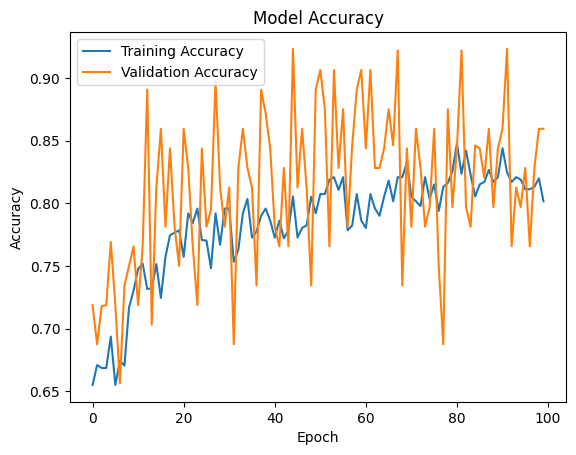

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7917 - loss: 0.3641


[0.3662794828414917, 0.8125]

In [9]:
plt.pyplot.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.pyplot.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.pyplot.title('Model Accuracy')
plt.pyplot.ylabel('Accuracy')
plt.pyplot.xlabel('Epoch')
plt.pyplot.legend(loc='upper left')
plt.pyplot.show()

scores = model_1.evaluate(test_ds)
scores

In [5]:
def inception_block(x, filters):
    # 1x1 convolution
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv1x1 = layers.MaxPooling2D((2, 2))(conv1x1)
    conv1x1 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(conv1x1)
    conv1x1 = layers.MaxPooling2D((2, 2))(conv1x1)

    # 1x1 convolution followed by 3x3 convolution
    conv3x3 = layers.Conv2D(filters[2], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3)
    conv3x3 = layers.MaxPooling2D((2, 2))(conv3x3)
    conv3x3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(conv3x3)
    conv3x3 = layers.Conv2D(filters[3], (3, 3), padding='same', activation='relu')(conv3x3)
    conv3x3 = layers.MaxPooling2D((2, 2))(conv3x3)


    # 1x1 convolution followed by 5x5 convolution
    conv5x5 = layers.Conv2D(filters[4], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[4], (3, 3), padding='same', activation='relu')(conv5x5)
    conv5x5 = layers.MaxPooling2D((2, 2))(conv5x5)
    conv5x5 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(conv5x5)
    conv5x5 = layers.Conv2D(filters[5], (3, 3), padding='same', activation='relu')(conv5x5)
    conv5x5 = layers.MaxPooling2D((2, 2))(conv5x5)


    # 3x3 Max Pooling followed by 1x1 convolution
    maxpool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool = layers.MaxPooling2D((2, 2))(maxpool)
    maxpool = layers.Conv2D(filters[6], (1, 1), padding='same', activation='relu')(maxpool)
    maxpool = layers.MaxPooling2D((2, 2))(maxpool)
    maxpool = layers.Conv2D(filters[7], (1, 1), padding='same', activation='relu')(maxpool)

    # Concatenate all branches
    inception_output = layers.concatenate([conv1x1, conv3x3, conv5x5, maxpool], axis=-1)

    return inception_output

# Build the CNN model
def build_model(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)

    x = resize_rescaling(input_layer)
    x = data_augmentation(x)

    # Apply the inception block
    x = inception_block(input_layer, filters=[48, 64, 92, 128, 64, 128, 32, 64])

    # Add some regular convolutional layers
    x = layers.Conv2D(192, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Add a residual connection just before the fully connected layer
    #residual = layers.Conv2D(128, (1, 1), padding='same')(x)  # Make sure the shapes match
    #x = layers.Add()([x, residual])

    # Flatten the feature map
    x = layers.Flatten()(x)
    x = layers.Dropout(0.3)(x)

    # Fully connected (dense) layer
    x = layers.Dense(200, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu')(x)

    # Output layer
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)

    return model


# Build the model
model_2 = build_model((image_width, image_height, 3), 2)

# Compile the model
model_2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 224, 224, 92)   │            368 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 224, 224, 64)   │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 224, 224, 92)   │         76,268 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 224, 224, 64)   │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 48)   │            192 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 112, 112, 92)   │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 112, 112, 64)   │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 112, 112, 3)    │              0 │ max_pooling2d_6[0][0]  │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 48)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 112, 112, 128)  │         11,904 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 112, 112, 128)  │          8,320 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 112, 112, 32)   │            128 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 112, 112, 64)   │          3,136 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 112, 112, 128)  │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 112, 112, 128)  │        147,584 │ conv2d_8[0][0]         │
├──────────────────────

 Total params: 29,105,318 (111.03 MB)

 Trainable params: 29,105,318 (111.03 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history_2 = model_2.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    verbose = 1,
    batch_size=batch_size
    )

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.5483 - loss: 30.8427 - val_accuracy: 0.5625 - val_loss: 0.7349
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 54s 838ms/step - accuracy: 0.5995 - loss: 0.7326 - val_accuracy: 0.6719 - val_loss: 0.5904
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 855ms/step - accuracy: 0.6987 - loss: 0.6519 - val_accuracy: 0.6875 - val_loss: 0.6554
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 880ms/step - accuracy: 0.7017 - loss: 0.6323 - val_accuracy: 0.7969 - val_loss: 0.4876
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 823ms/step - accuracy: 0.7131 - loss: 0.5134 - val_accuracy: 0.8125 - val_loss: 0.4641
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 879ms/step - accuracy: 0.7482 - loss: 0.4859 - val_accuracy: 0.6250 - val_loss: 0.5663
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 832ms/step - accuracy: 0.6998 - loss: 0.5283 - val_accuracy: 0.7812 - val_loss: 0.4779
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 909ms/step - accuracy: 0.7309 - loss: 0.5541 - v

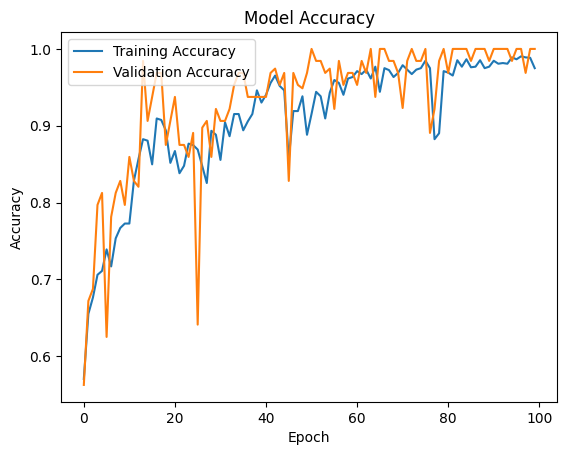

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 1.0000 - loss: 0.0100


[0.012325569055974483, 1.0]

In [10]:
plt.pyplot.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.pyplot.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.pyplot.title('Model Accuracy')
plt.pyplot.ylabel('Accuracy')
plt.pyplot.xlabel('Epoch')
plt.pyplot.legend(loc='upper left')
plt.pyplot.show()

scores = model_2.evaluate(test_ds)
scores

In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
path = "/content/drive/MyDrive/Colab Notebooks/new_way/raw image/malignant/malignant (1).png"
#path = "/content/drive/MyDrive/Colab Notebooks/new_way/raw image/benign/benign (1).png"
img_path = 'path_to_your_image.jpg'
img = image.load_img(path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add a batch dimension (model expects a batch of images, even if it's just one image)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for the model
img_array = preprocess_input(img_array)

# Make predictions
predictions = model_2.predict(img_array)

# Output the predictions
print("Predictions:", predictions)

# For classification, get the predicted class
predicted_class = np.argmax(predictions, axis=-1)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [[1.0000000e+00 1.4500835e-13]]
Predicted class: [0]
